<a href="https://colab.research.google.com/github/DeathNOTbook/my-deposit/blob/master/SVM_for_the_heart_diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics

In [0]:
df=pd.read_csv('https://raw.githubusercontent.com/DeathNOTbook/my-deposit/master/heart.csv')

In [0]:
x=df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]

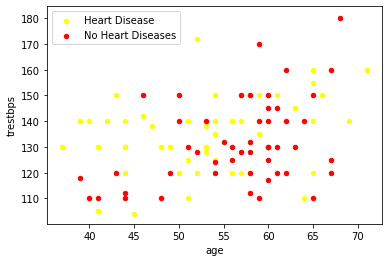

In [22]:
ax=df[df['target']==1][0:50].plot(kind='scatter',x='age',y='trestbps',color='yellow',label='Heart Disease');
df[df['target']==0][0:50].plot(kind='scatter',x='age',y='trestbps',color='red',label='No Heart Diseases',ax=ax);
plt.show()

In [4]:
x=x.values
x[0:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [0]:
from sklearn import preprocessing

In [0]:
y=df['target']

In [0]:
x=preprocessing.StandardScaler().fit(x).transform(x.astype(float))

In [0]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=4)

In [0]:
from sklearn import svm

In [0]:
clf=svm.SVC(kernel='rbf')

In [15]:
clf.fit(xtrain,ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
from sklearn import metrics
ans=clf.predict(xtest)

In [25]:
print('The score is:',metrics.accuracy_score(ytest,ans))

The score is: 0.8688524590163934


In [26]:
metrics.f1_score(ytest,ans)

0.8787878787878789

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.77      0.96      0.86        25
           1       0.97      0.81      0.88        36

    accuracy                           0.87        61
   macro avg       0.87      0.88      0.87        61
weighted avg       0.89      0.87      0.87        61

Confusion matrix, without normalization
[[24  1]
 [ 7 29]]


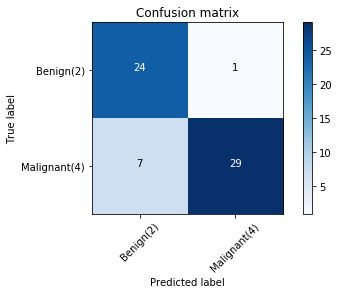

In [30]:
cnf_matrix = confusion_matrix(ytest,ans)
np.set_printoptions(precision=2)

print (classification_report(ytest,ans))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')